In [1]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import torch 
import pandas as pd
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset , DataLoader
import matplotlib.pyplot as plt


In [3]:
train_path = 'https://raw.githubusercontent.com/FabioNicotra/fabionicotra.github.io/main/02_MobileClassification/train.csv'
test_path = 'https://raw.githubusercontent.com/FabioNicotra/fabionicotra.github.io/main/02_MobileClassification/test.csv'
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [4]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [96]:
x = train_df.drop('price_range', axis=1)
y = train_df['price_range']
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

📌split data to train and test with sklearn

In [38]:
x_train , x_valid , y_train , y_valid = train_test_split(x , y , train_size=0.7 , random_state=101)

In [39]:
x_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
882,1156,1,2.7,1,1,1,30,0.9,173,3,16,945,1913,2735,16,15,13,1,0,1
964,648,0,1.9,1,4,0,8,1.0,91,5,19,819,1997,2991,8,7,4,0,0,1
1249,504,1,2.8,1,2,0,54,0.4,163,2,10,1207,1539,2378,17,11,2,1,0,0
30,1579,1,0.5,1,0,0,5,0.2,88,7,9,1358,1739,3532,17,11,12,0,0,1
1518,844,0,2.2,1,1,1,22,0.9,197,7,2,777,1995,3154,14,11,7,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,1166,1,0.5,0,7,0,59,0.5,80,1,11,437,638,3887,8,6,7,1,0,1
1862,1043,0,2.7,0,3,0,29,0.2,83,8,17,887,893,1183,5,3,8,1,0,0
1361,1549,1,1.5,1,0,1,27,0.4,113,5,7,632,1162,436,10,8,11,1,0,0
1547,1611,0,0.5,1,4,1,27,0.9,199,1,10,163,1011,3078,15,2,6,1,0,1


📌method2 train test split

📌preprocess

In [40]:
print(x_train.dtypes)
print(type(x_train.values))
print(x_train.values.dtype)

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object
<class 'numpy.ndarray'>
float64


In [41]:
x_train = torch.FloatTensor(x_train.values)
# in classification we should give intiger to network
y_train = torch.LongTensor(y_train.values)

In [42]:
x_valid = torch.FloatTensor(x_valid.values)
# in classification we should give intiger to network
y_valid = torch.LongTensor(y_valid.values)

📌standardization

In [43]:
#dime=0 it ger mean of each feature and if dime=1 it get mean for each sample which is wrong
print(x_train.shape)
mu = x_train.mean(dim=0)
std = x_train.std(dim=0)

torch.Size([1400, 20])


In [44]:
 x_train = (x_train - mu) / std
 x_valid = (x_valid - mu) / std

📌dataloader

In [45]:
train_data = TensorDataset(x_train , y_train)
valid_data = TensorDataset(x_valid , y_valid)

train_data.tensors

(tensor([[-0.2050,  1.0155,  1.4617,  ...,  0.5683, -1.0068,  0.9897],
         [-1.3516, -0.9841,  0.4723,  ..., -1.7582, -1.0068,  0.9897],
         [-1.6766,  1.0155,  1.5854,  ...,  0.5683, -1.0068, -1.0097],
         ...,
         [ 0.6821,  1.0155, -0.0223,  ...,  0.5683, -1.0068, -1.0097],
         [ 0.8220, -0.9841, -1.2591,  ...,  0.5683, -1.0068,  0.9897],
         [ 0.4022, -0.9841, -0.3934,  ...,  0.5683,  0.9925,  0.9897]]),
 tensor([2, 2, 2,  ..., 0, 2, 0]))

In [46]:
train_loader = DataLoader(train_data , 100 , True)
#batch_size of test data can be bigger because gradian is off and also shuffle is not necessery
valid_loader = DataLoader(valid_data , 200 , False)

print(train_loader.batch_size)
print(len(train_loader))
print(len(valid_loader))

100
14
3


In [47]:
x_batch, y_batch = next(iter(train_loader))
x_batch 

tensor([[-1.4193,  1.0155, -1.2591,  ...,  0.5683,  0.9925,  0.9897],
        [ 1.4766,  1.0155, -1.2591,  ...,  0.5683, -1.0068, -1.0097],
        [-1.4915, -0.9841, -1.2591,  ...,  0.5683,  0.9925,  0.9897],
        ...,
        [ 1.4202, -0.9841, -1.2591,  ...,  0.5683,  0.9925, -1.0097],
        [-1.4735, -0.9841, -0.8881,  ...,  0.5683,  0.9925,  0.9897],
        [-0.1124, -0.9841, -0.2697,  ...,  0.5683,  0.9925,  0.9897]])

📌model denfining

In [76]:
num_fratures = 20
num_classes = 4
h1=64
h2=32

model = nn.Sequential(
    nn.Linear(num_fratures , h1),
    nn.ReLU(),
    nn.Linear(h1 , h2),
    nn.ReLU(),
    nn.Linear(h2 , num_classes)
)


In [77]:
model

Sequential(
  (0): Linear(in_features=20, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=4, bias=True)
)

In [78]:
#testing out model to findout any problem with input and output
yp = model(x_batch)
yp[:2,:]

tensor([[-0.3310,  0.1913,  0.1444, -0.1263],
        [-0.3330,  0.2394,  0.0250, -0.1006]], grad_fn=<SliceBackward0>)

In [79]:
#numel is number of elements
[torch.numel(p) for p in model.parameters()]

# result is [fist layer weight ,first layer bias , second layer weight , second layer bias , weight , bias]

[1280, 64, 2048, 32, 128, 4]

In [80]:
#total number of parameters
torch.tensor([torch.numel(p) for p in model.parameters()]).sum()

tensor(3556)

📌loss and optimizer

In [81]:
#it add softmax by itself and then compute loss 
# but if you want to use model for prediction you should add a softmax to model
loss_fn = nn.CrossEntropyLoss()

#requier a sigmoid layer at the end of the model : nn.Sigmoid()
#nn.BCELoss()

#it add a sigmoid in last layer by itself and then compute loss
#nn.BCEWithLogitsLoss

In [82]:
optimizer = optim.SGD(model.parameters() , lr= 0.01)

📌Devise 

In [83]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [84]:
model = model.to(device)
model[0].weight

Parameter containing:
tensor([[ 0.2228,  0.1310,  0.1209,  ...,  0.1758,  0.1299,  0.0967],
        [-0.0496,  0.1101,  0.0432,  ...,  0.0640,  0.2111,  0.1215],
        [-0.2068, -0.1676, -0.1318,  ..., -0.0299,  0.0822, -0.0967],
        ...,
        [ 0.2224,  0.1962,  0.1273,  ...,  0.1123,  0.0478,  0.1166],
        [-0.0616,  0.2129,  0.0348,  ...,  0.2070, -0.1747,  0.0506],
        [-0.0166,  0.1278, -0.1354,  ...,  0.1132, -0.0413, -0.1723]],
       requires_grad=True)

📌utils

In [85]:
class AverageMeter(object):
    #computes and store the average and current value
    def __init__(self):
        self.reset()
    def reset(self):
        self.val=0
        self.avg=0
        self.sum=0
        self.count=0
    def update(self , val , n=1):
        self.val=val
        self.sum += val*n
        self.count +=n
        self.avg = self.sum /self.count

In [86]:
loss_meter = AverageMeter()
loss_meter.update(1)
loss_meter.update(3)
loss_meter.avg

2.0

In [87]:
#!pip install torchmetrics

In [88]:
a = torch.tensor([0, 1, 2, 3])
b = torch.tensor([0, 2, 1, 3])

from torchmetrics import Accuracy  

acc = Accuracy(task="multiclass", num_classes=4)
acc(a,b)

tensor(0.5000)

📌training loop

In [93]:
num_epoch=100
loss_train_hist = []
loss_valid_hist = []
acc_train_hist = []
acc_valid_hist = []

for epoch in range(num_epoch):
    loss_train =  AverageMeter()
    acc_train = Accuracy(task="multiclass", num_classes=4).to(device)
    #acc_train = Accuracy(task="multiclass", num_classes=4)
    
    for i , (inputs,targets) in enumerate(train_loader):
        inputs = inputs.to(device)
        targets = targets.to(device)
        
        yp = model(inputs)
        loss = loss_fn(yp , targets)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_train.update(loss.item())
        #acc = torch.sum(yp.argmax(dim=1) == targets)
        acc_train(yp , targets)
        
    
    with torch.no_grad():
        loss_valid = AverageMeter()
        acc_test = Accuracy(task="multiclass", num_classes=4).to(device)
        for i , (inputs,targets) in enumerate(valid_loader):
            inputs = inputs.to(device)
            targets = targets.to(device)
        
            yp = model(inputs)
            loss = loss_fn(yp , targets)
            loss_valid.update(loss.item())
            acc_test(yp , targets)
            
    loss_train_hist.append(loss_train.avg)
    loss_valid_hist.append(loss_valid.avg)

    acc_train_hist.append(acc_train.compute())
    acc_valid_hist.append(acc_test.compute())
    
    if(epoch %10 == 0):
        print(f'Epoch : {epoch}')
        print(f'train_loss: {loss_train.avg : .4}, accuracy = {acc_train.compute() }')
        print(f'valid_loss: {loss_valid.avg : .4}, accuracy = {acc_test.compute() } \n')

print('done')


Epoch : 0
train_loss:  0.188, accuracy = 0.970714271068573
valid_loss:  0.2539, accuracy = 0.9133333563804626 

Epoch : 10
train_loss:  0.1758, accuracy = 0.9728571176528931
valid_loss:  0.2439, accuracy = 0.9166666865348816 

Epoch : 20
train_loss:  0.1653, accuracy = 0.9735714197158813
valid_loss:  0.2357, accuracy = 0.9166666865348816 

Epoch : 30
train_loss:  0.1559, accuracy = 0.9764285683631897
valid_loss:  0.2278, accuracy = 0.9166666865348816 

Epoch : 40
train_loss:  0.1475, accuracy = 0.9778571724891663
valid_loss:  0.2215, accuracy = 0.9200000166893005 

Epoch : 50
train_loss:  0.1397, accuracy = 0.9800000190734863
valid_loss:  0.215, accuracy = 0.9200000166893005 

Epoch : 60
train_loss:  0.1328, accuracy = 0.9800000190734863
valid_loss:  0.21, accuracy = 0.9200000166893005 

Epoch : 70
train_loss:  0.1266, accuracy = 0.9814285635948181
valid_loss:  0.2053, accuracy = 0.9200000166893005 

Epoch : 80
train_loss:  0.1206, accuracy = 0.9835714101791382
valid_loss:  0.201, accu

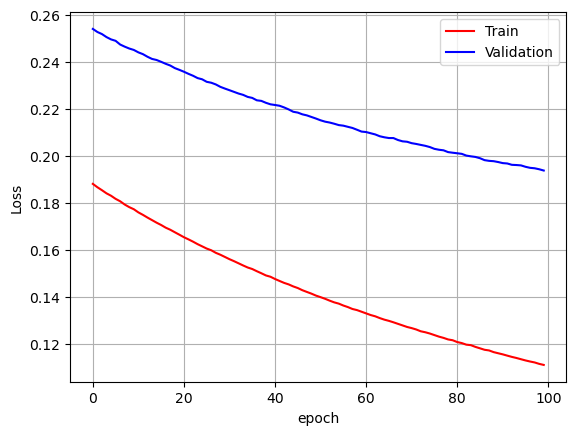

In [94]:
plt.plot(range(num_epoch), loss_train_hist , 'r-', label= 'Train')
plt.plot(range(num_epoch), loss_valid_hist , 'b-', label= 'Validation')

plt.xlabel('epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

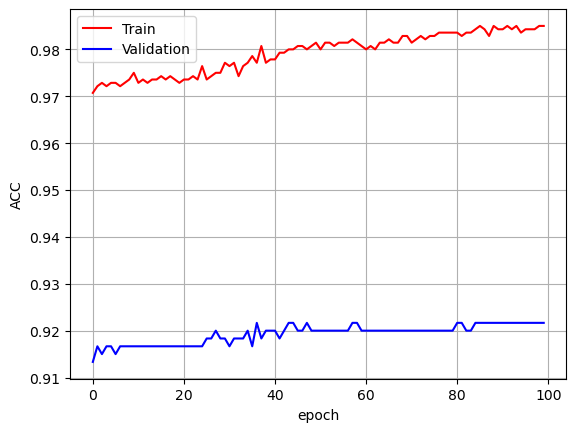

In [95]:
plt.plot(range(num_epoch), acc_train_hist , 'r-', label= 'Train')
plt.plot(range(num_epoch), acc_valid_hist , 'b-', label= 'Validation')

plt.xlabel('epoch')
plt.ylabel('ACC')
plt.grid(True)
plt.legend()

📌save model

In [ ]:
torch.save(model , 'model.pth')

In [ ]:
my_model = torch.load('model.pth')